In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("Dataset/Dataset.csv")
display(df.head())

,ID,organisation,records_lost,date,year,month,sector,sector_1,sector_2,method,data_sensitivity,data_sensitivity_text,source_name
0,418,Plex,15000000,Aug 2022,2022,August,web,web,No other sector,hacked,1,Just email address/Online information,Ars technica
1,419,Twitter,5400000,Dec 2021,2021,December,web,web,No other sector,hacked,2,SSN/Personal details,Bleeping Computer
2,420,Shanghai Police,500000000,Jul 2022,2022,July,financial,financial,No other sector,hacked,5,Full details,The Register
3,421,"City of Amagasaki, Japan",500000,Jun 2022,2022,June,government,government,No other sector,oops!,3,Credit card information,BBC
4,417,Dubai Real Estate Leak,800000,May 2022,2022,May,financial,financial,No other sector,inside job,1,Just email address/Online information,E24


In [9]:
#create needed data subset
df_model = df.groupby(['year'])['year'].size().reset_index(name='data_breach_count')

df_model

,year,data_breach_count
0,2004,1
1,2005,3
2,2006,5
3,2007,10
4,2008,19
5,2009,9
6,2010,13
7,2011,37
8,2012,23
9,2013,35


Coefficients:  [[1.23634904]]
Variance score: 0.6062209569222202


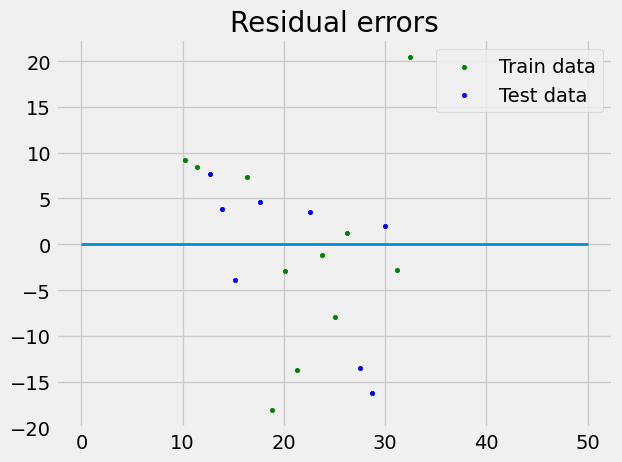

accuracy: 0.6062209569222202


In [30]:
# defining feature matrix(X) and response vector(y)
target = 'data_breach_count'
feature = 'year'

X = df_model[feature].values.reshape(-1,1)
y = df_model[target].values.reshape(-1,1)

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
													random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()

## show accuracy
print("accuracy:",format(reg.score(X_test, y_test)))
